# 1.Tải dữ liệu

## 1.1.Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.colors as mcolors


## 1.2.Tải và phân tích dữ liệu

In [3]:
# Tải dữ liệu train.csv
data = pd.read_csv("data/train.csv")

# Hiển thị thông tin cơ bản
print("Dữ liệu ban đầu:")
print(data.head())
print("\nThông tin dữ liệu:")
print(data.info())

# Kiểm tra phân phối nhãn (ví dụ cột 'Survived')
print("\nPhân phối nhãn:")
print(data['Survived'].value_counts())


Dữ liệu ban đầu:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

# 2.Các bước thực hiện

## 2.1.Chuẩn bị dữ liệu

### 2.1.1.Tách đặc trưng và nhãn

In [4]:
# Tách dữ liệu đặc trưng (X) và nhãn (y)
X = data.drop(columns=['PassengerId', 'Survived'])
y = data['Survived']

# Chuyển đổi các cột dạng văn bản thành số (nếu có)
X = pd.get_dummies(X, drop_first=True)

# In thông tin của dữ liệu X và y
print("Dữ liệu đặc trưng (X):")
print(X.head())
print("\nNhãn (y):")
print(y.head())



Dữ liệu đặc trưng (X):
   Pclass   Age  SibSp  Parch     Fare  Name_Abbott, Mr. Rossmore Edward  \
0       3  22.0      1      0   7.2500                             False   
1       1  38.0      1      0  71.2833                             False   
2       3  26.0      0      0   7.9250                             False   
3       1  35.0      1      0  53.1000                             False   
4       3  35.0      0      0   8.0500                             False   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelson, Mr. Samuel  \
0                                  False                     False   
1                                  False                     False   
2                                  False                     False   
3                                  False                     False   
4                                  False                     False   

   Name_Abelson, Mrs. Samuel (Hannah Wizosky)  \
0                                       False   
1

### 2.1.2.Phân tích dữ liệu gốc

Thống kê mô tả dữ liệu:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Số lượng giá trị bị thiếu:
PassengerId      0
Survived  

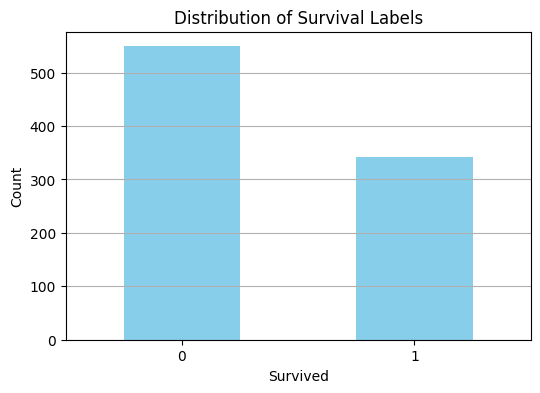

In [5]:
# Hiển thị thống kê mô tả
print("Thống kê mô tả dữ liệu:")
print(data.describe())

# Kiểm tra các giá trị null
print("\nSố lượng giá trị bị thiếu:")
print(data.isnull().sum())

# Phân phối nhãn
print("\nPhân phối các giá trị nhãn (Survived):")
print(y.value_counts())

# Biểu đồ phân phối nhãn
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Survival Labels")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


### 2.1.3.Phân chia dữ liệu train/test với các tỷ lệ khác nhau

In [6]:
from sklearn.model_selection import train_test_split

# Định nghĩa các tỷ lệ train/test
splits = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = {}

for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        train_size=train_size, 
        test_size=test_size, 
        stratify=y, 
        random_state=42
    )
    datasets[(train_size, test_size)] = (X_train, X_test, y_train, y_test)
    
    print(f"Tỉ lệ {int(train_size*100)}/{int(test_size*100)}:")
    print(f"  Số lượng mẫu huấn luyện: {len(y_train)}")
    print(f"  Số lượng mẫu kiểm tra: {len(y_test)}")


Tỉ lệ 40/60:
  Số lượng mẫu huấn luyện: 356
  Số lượng mẫu kiểm tra: 535
Tỉ lệ 60/40:
  Số lượng mẫu huấn luyện: 534
  Số lượng mẫu kiểm tra: 357
Tỉ lệ 80/20:
  Số lượng mẫu huấn luyện: 712
  Số lượng mẫu kiểm tra: 179
Tỉ lệ 90/10:
  Số lượng mẫu huấn luyện: 801
  Số lượng mẫu kiểm tra: 90


### 2.1.4.Biểu đồ thể hiện các tỉ lệ train/test

Biểu đồ phân phối lớp cho tỉ lệ 40/60:


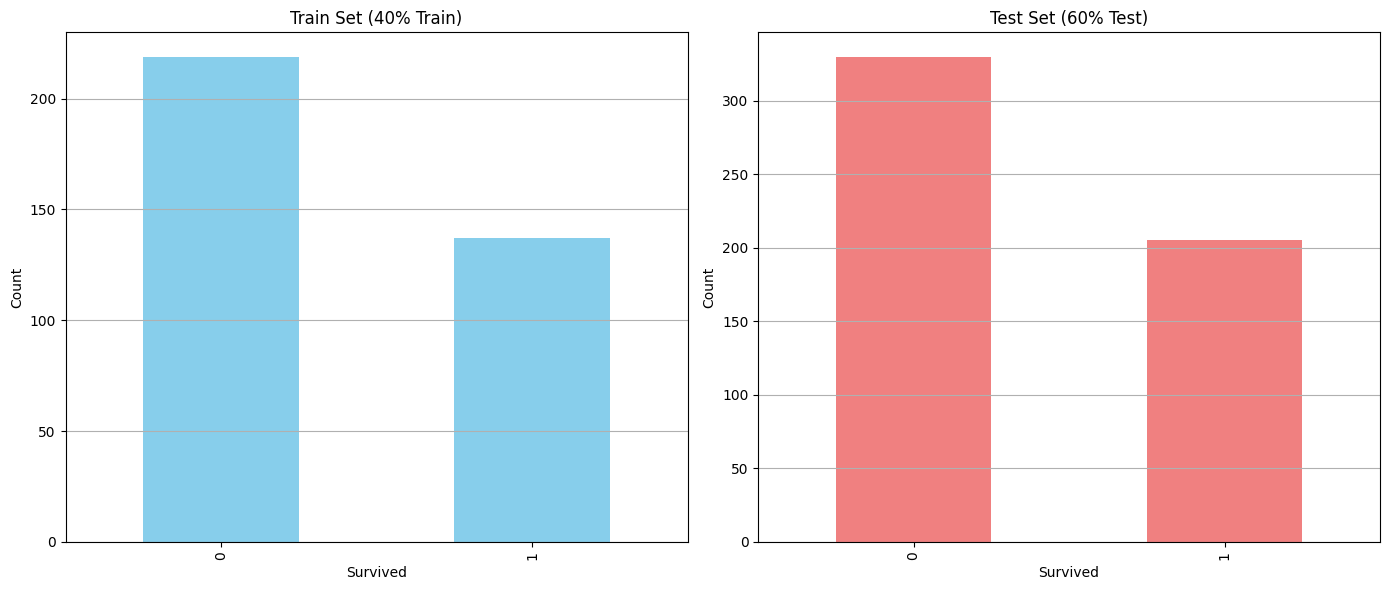

Biểu đồ phân phối lớp cho tỉ lệ 60/40:


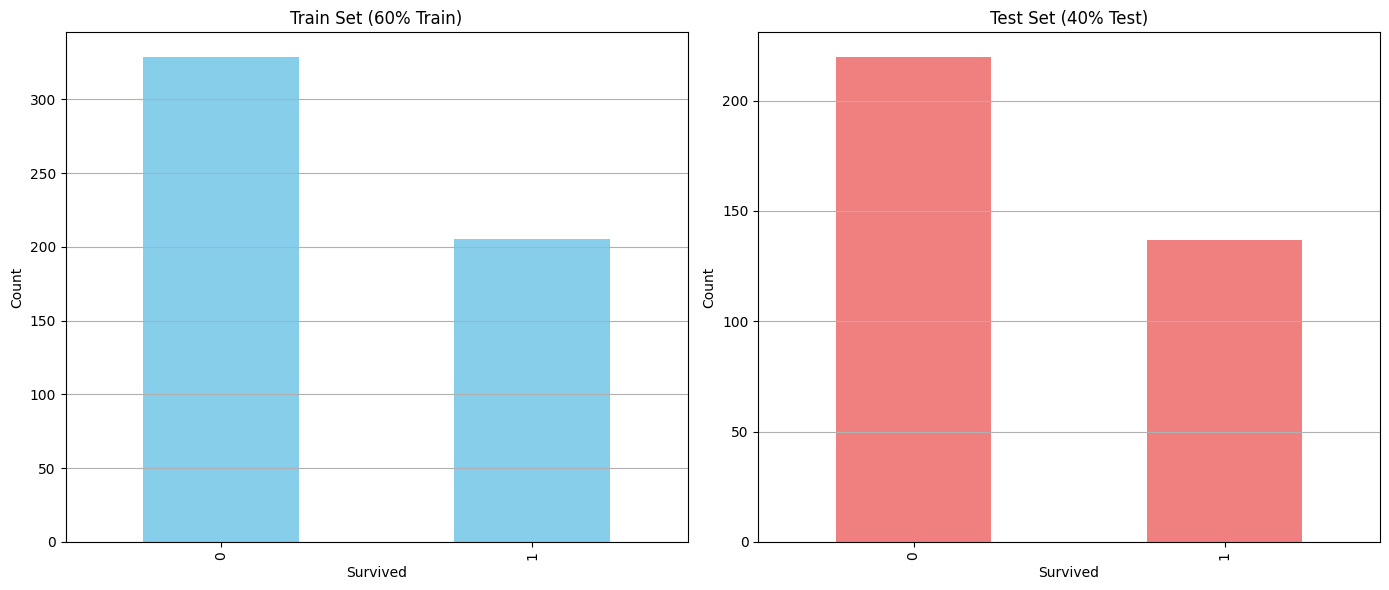

Biểu đồ phân phối lớp cho tỉ lệ 80/20:


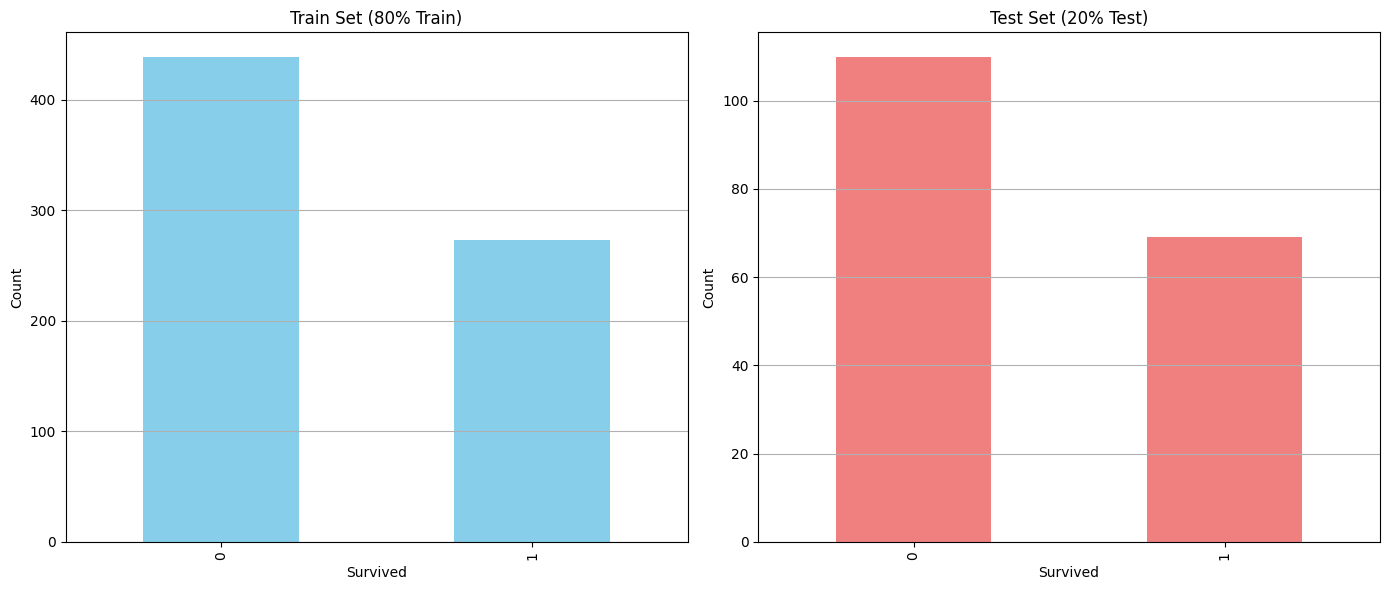

Biểu đồ phân phối lớp cho tỉ lệ 90/10:


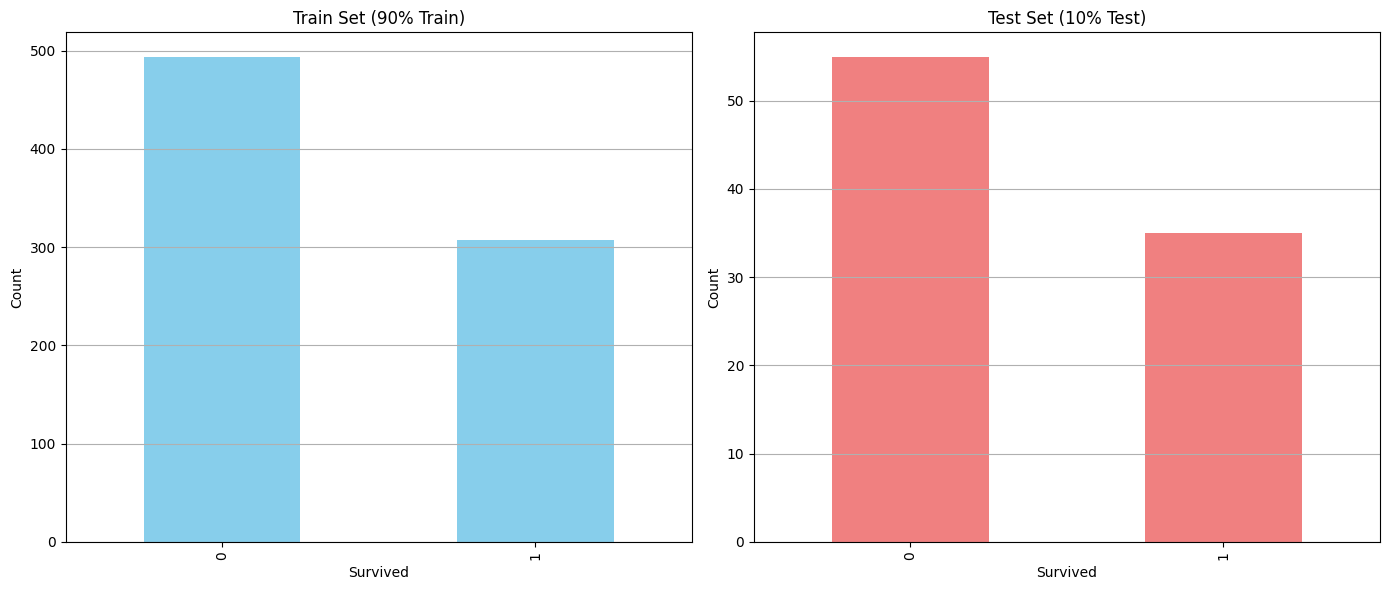

In [7]:
import matplotlib.pyplot as plt

# Hàm vẽ biểu đồ phân phối lớp
def plot_class_distribution_together(y_train, y_test, train_title, test_title):
    """
    Vẽ biểu đồ phân phối lớp cho tập huấn luyện và kiểm tra trên cùng một hình.
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # Tạo hai biểu đồ cạnh nhau
    
    # Biểu đồ tập huấn luyện
    y_train.value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax[0])
    ax[0].set_title(train_title)
    ax[0].set_xlabel('Survived')
    ax[0].set_ylabel('Count')
    ax[0].grid(axis='y')
    
    # Biểu đồ tập kiểm tra
    y_test.value_counts().sort_index().plot(kind='bar', color='lightcoral', ax=ax[1])
    ax[1].set_title(test_title)
    ax[1].set_xlabel('Survived')
    ax[1].set_ylabel('Count')
    ax[1].grid(axis='y')
    
    # Tối ưu hóa hiển thị
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ phân phối lớp cho từng tỷ lệ đã có trong datasets
for (train_size, test_size), (_, _, y_train, y_test) in datasets.items():
    print(f"Biểu đồ phân phối lớp cho tỉ lệ {int(train_size*100)}/{int(test_size*100)}:")
    plot_class_distribution_together(
        y_train, y_test,
        f"Train Set ({int(train_size*100)}% Train)", 
        f"Test Set ({int(test_size*100)}% Test)"
    )


## 2.2. Xây dựng bộ phân loại cây quyết định và trực quan hóa

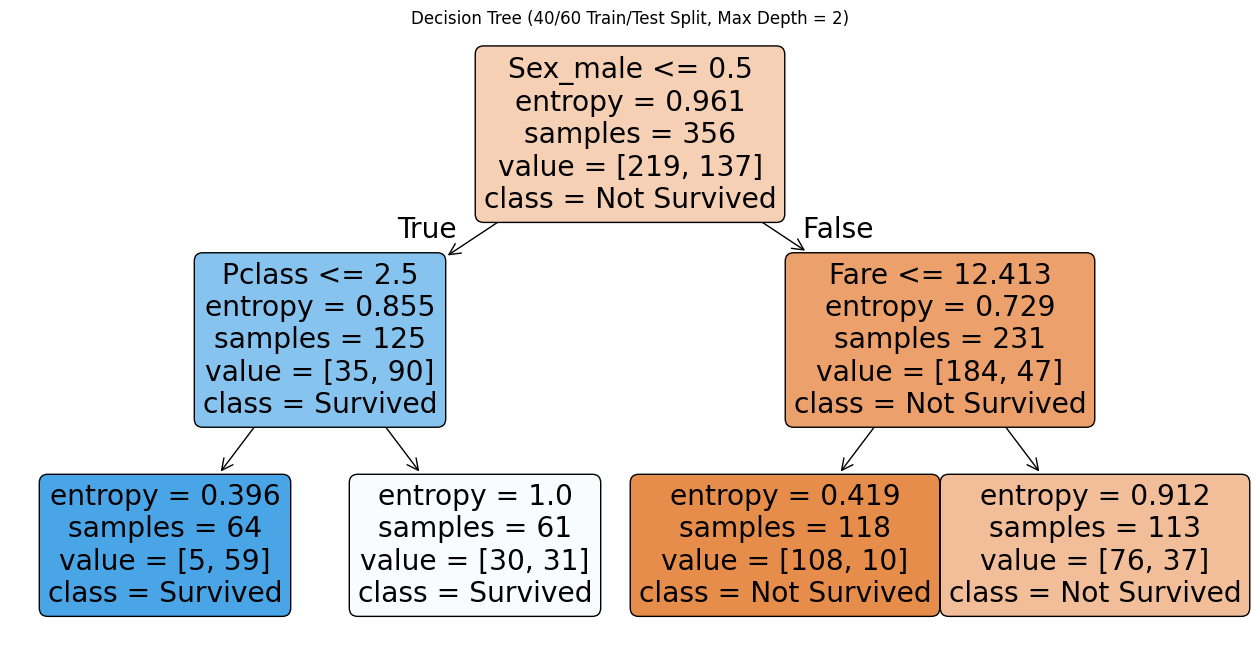

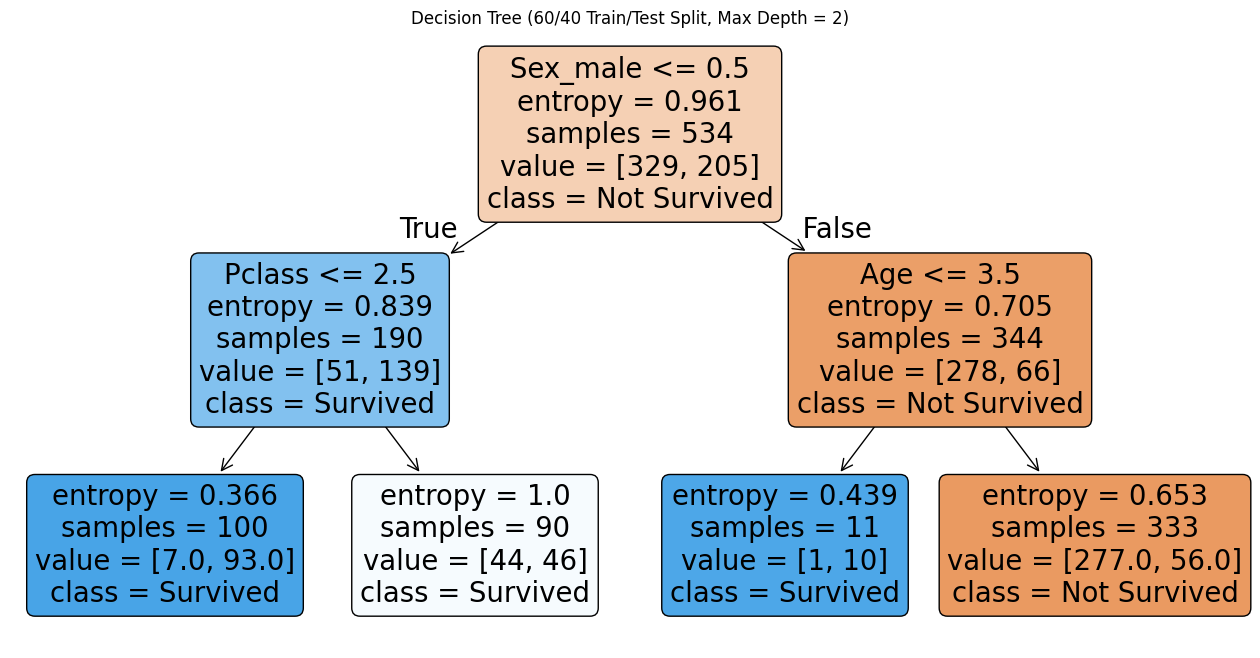

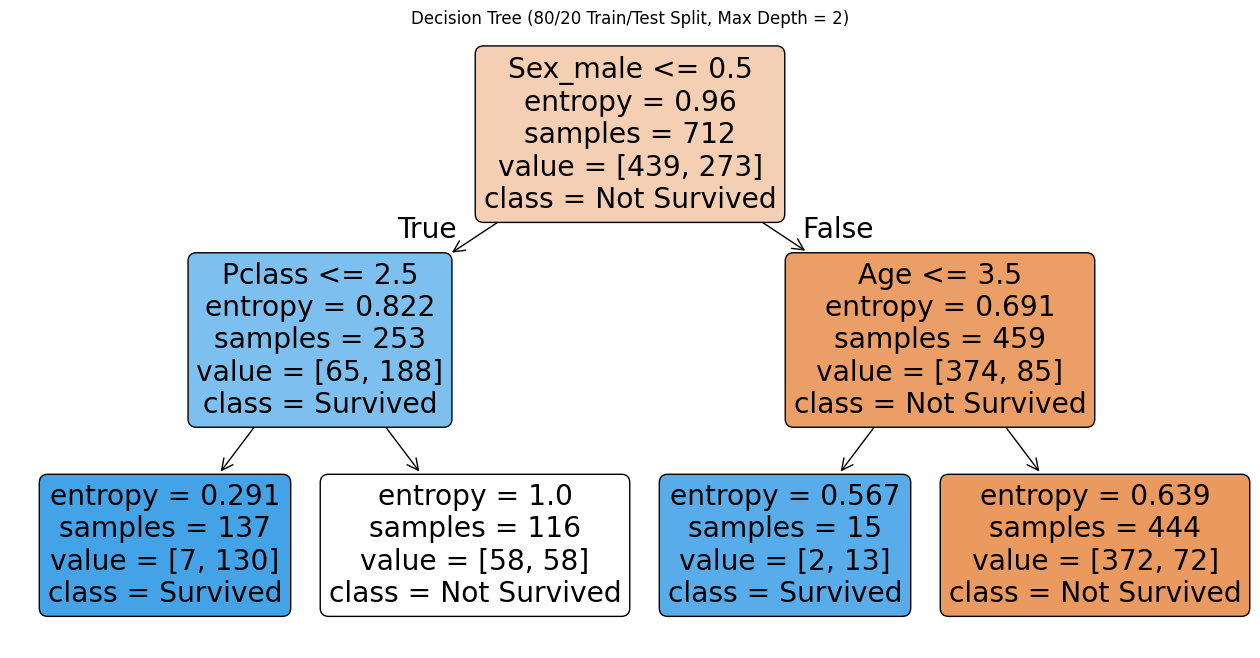

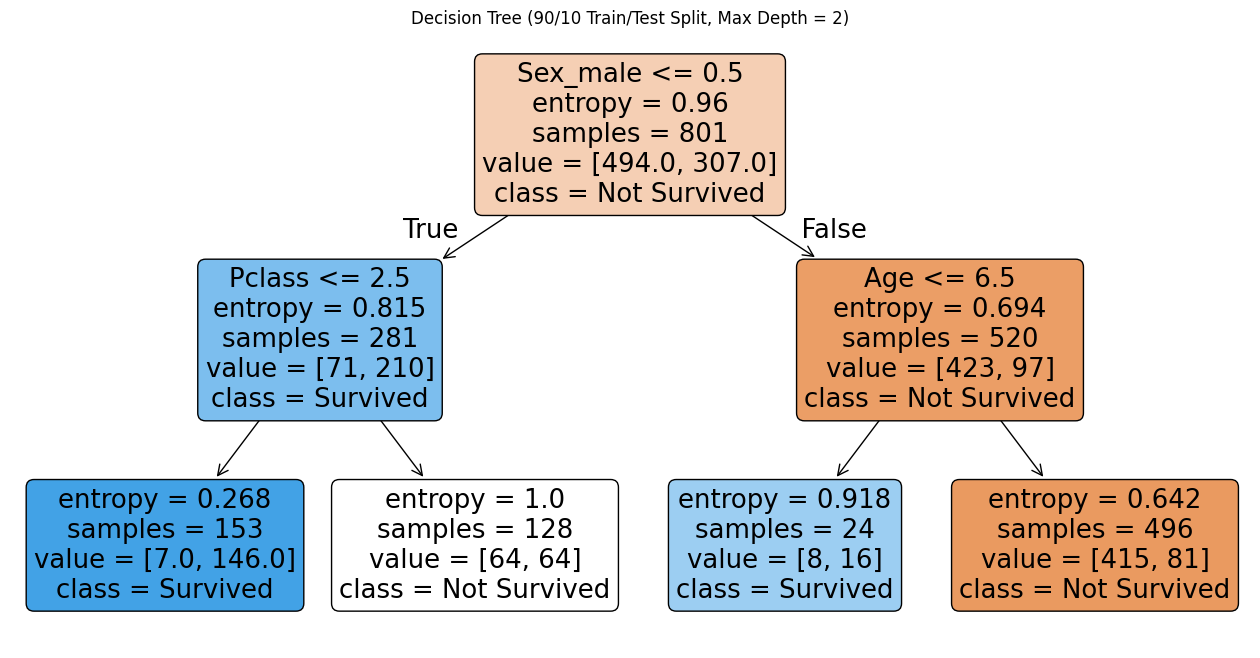

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hàm xây dựng và trực quan hóa cây quyết định
def build_and_visualize_tree(X_train, y_train, train_size, test_size, max_depth=3):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    
    # Trực quan hóa cây quyết định
    plt.figure(figsize=(16, 8))
    plot_tree(
        clf, 
        feature_names=X_train.columns, 
        class_names=['Not Survived', 'Survived'], 
        filled=True, 
        rounded=True
    )
    plt.title(f"Decision Tree ({int(train_size*100)}/{int(test_size*100)} Train/Test Split, Max Depth = {max_depth})")
    plt.show()

# Thực hiện với các tỷ lệ train/test
for train_size, test_size in splits:
    X_train, X_test, y_train, y_test = datasets[(train_size, test_size)]
    build_and_visualize_tree(X_train, y_train, train_size, test_size, max_depth=2)


## 2.3.Đánh giá bộ phân loại cây quyết định


Evaluating Decision Tree for split 40/60:
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.91      0.85       330
    Survived       0.82      0.63      0.71       205

    accuracy                           0.81       535
   macro avg       0.81      0.77      0.78       535
weighted avg       0.81      0.81      0.80       535


Confusion Matrix:
[[301  29]
 [ 75 130]]


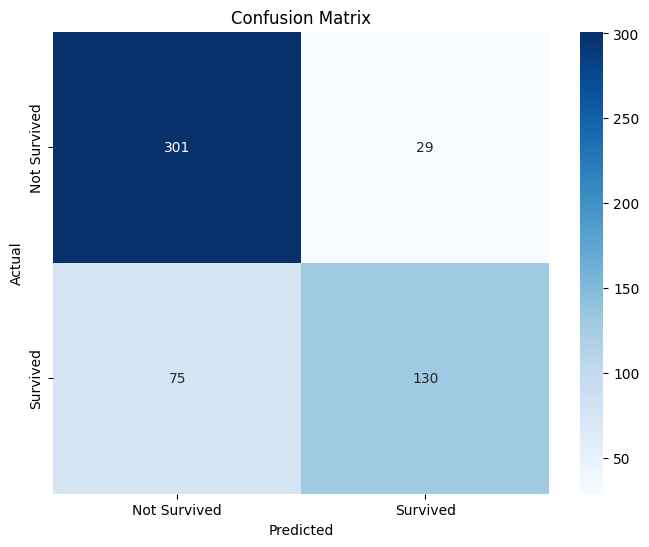


Evaluating Decision Tree for split 60/40:
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.78      0.92      0.85       220
    Survived       0.83      0.59      0.69       137

    accuracy                           0.80       357
   macro avg       0.81      0.76      0.77       357
weighted avg       0.80      0.80      0.79       357


Confusion Matrix:
[[203  17]
 [ 56  81]]


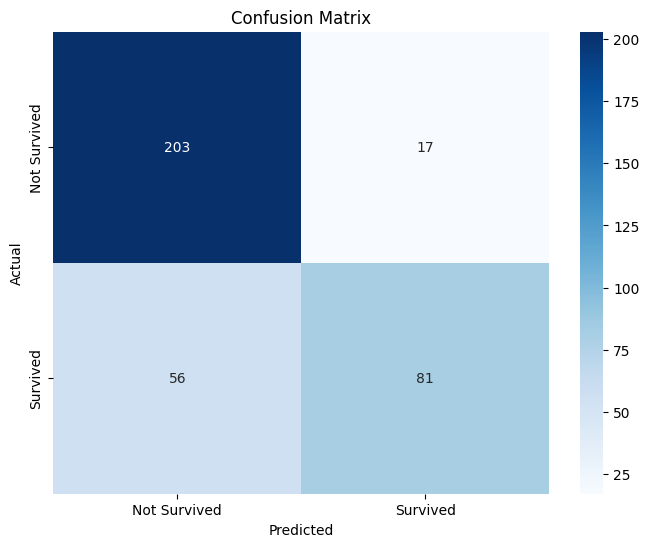


Evaluating Decision Tree for split 80/20:
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.90      0.85       110
    Survived       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[99 11]
 [24 45]]


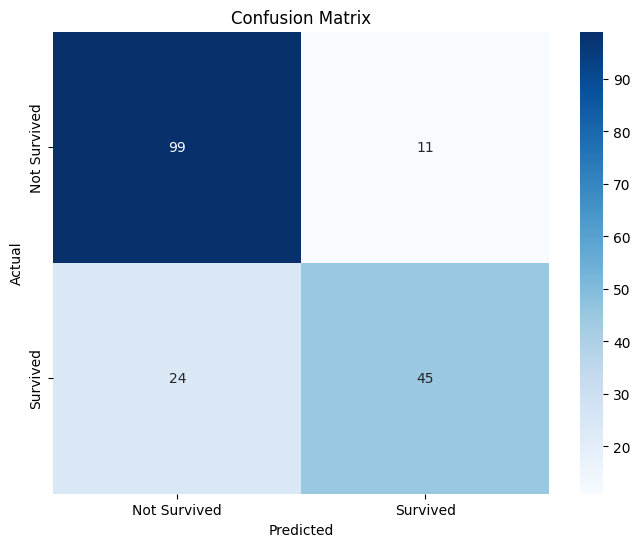


Evaluating Decision Tree for split 90/10:
Classification Report:
              precision    recall  f1-score   support

Not Survived       0.80      0.87      0.83        55
    Survived       0.77      0.66      0.71        35

    accuracy                           0.79        90
   macro avg       0.78      0.76      0.77        90
weighted avg       0.79      0.79      0.79        90


Confusion Matrix:
[[48  7]
 [12 23]]


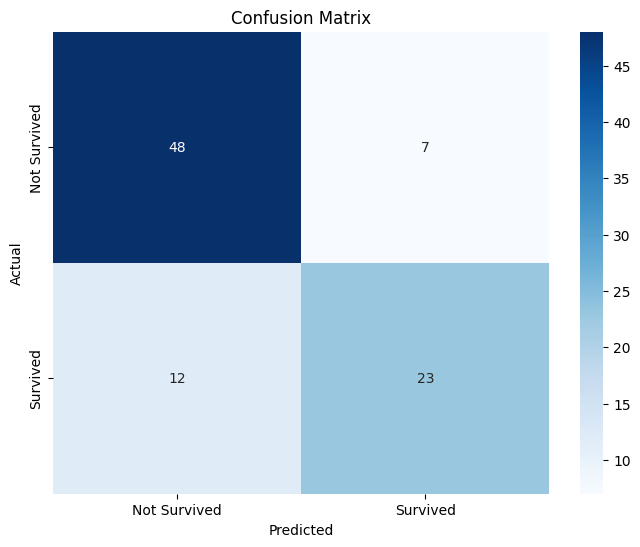

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Hàm đánh giá hiệu suất mô hình
def evaluate_model(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    
    # Báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'], zero_division=0))
    
    # Ma trận nhầm lẫn
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Đánh giá cho từng tỷ lệ
for train_size, test_size in splits:
    print(f"\nEvaluating Decision Tree for split {int(train_size*100)}/{int(test_size*100)}:")
    X_train, X_test, y_train, y_test = datasets[(train_size, test_size)]
    clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    evaluate_model(clf, X_test, y_test)


## 2.4.Độ sâu và độ chính xác của cây quyết định (80/20)

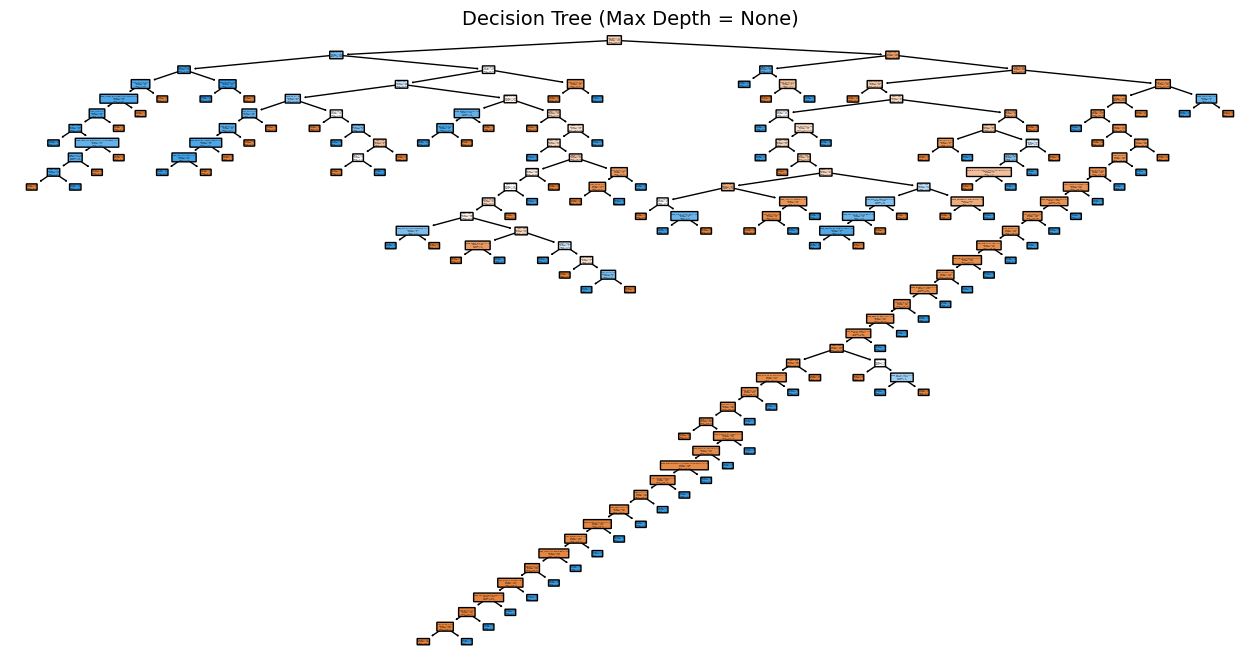

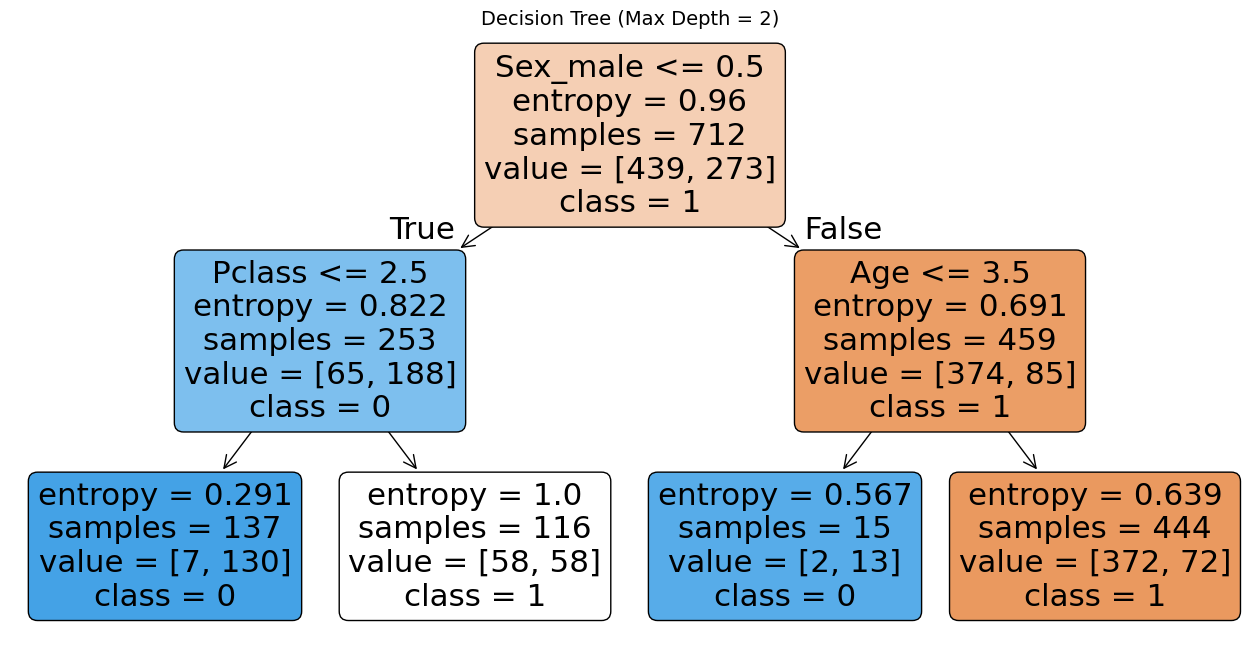

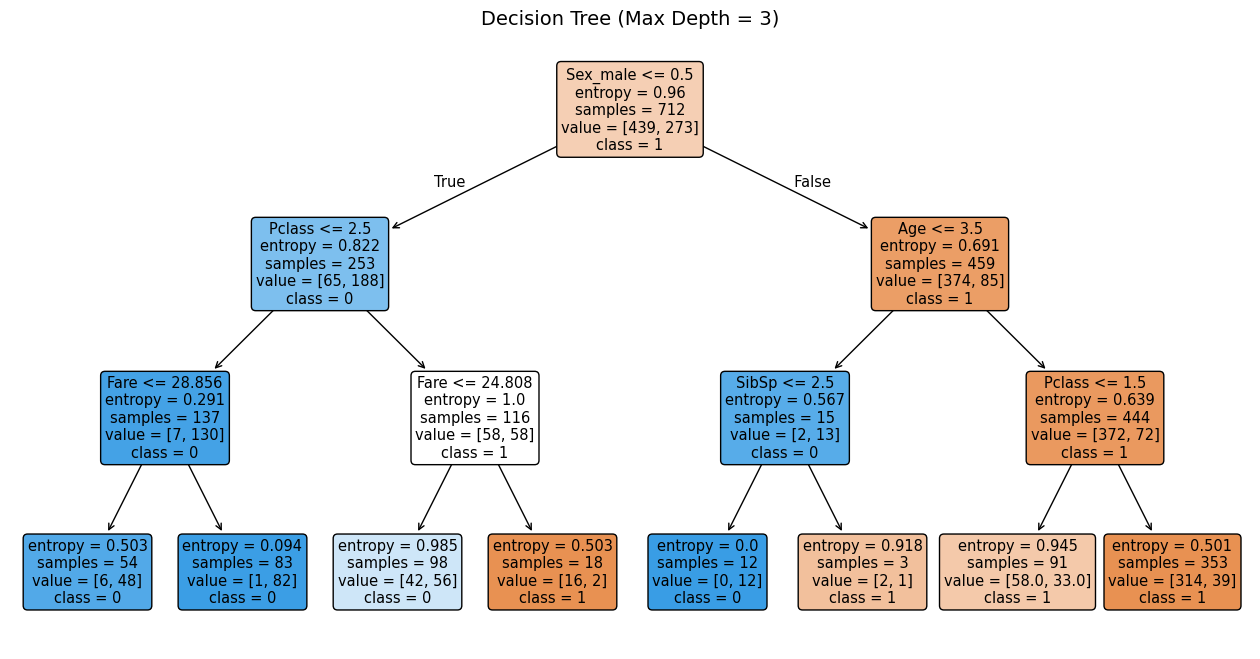

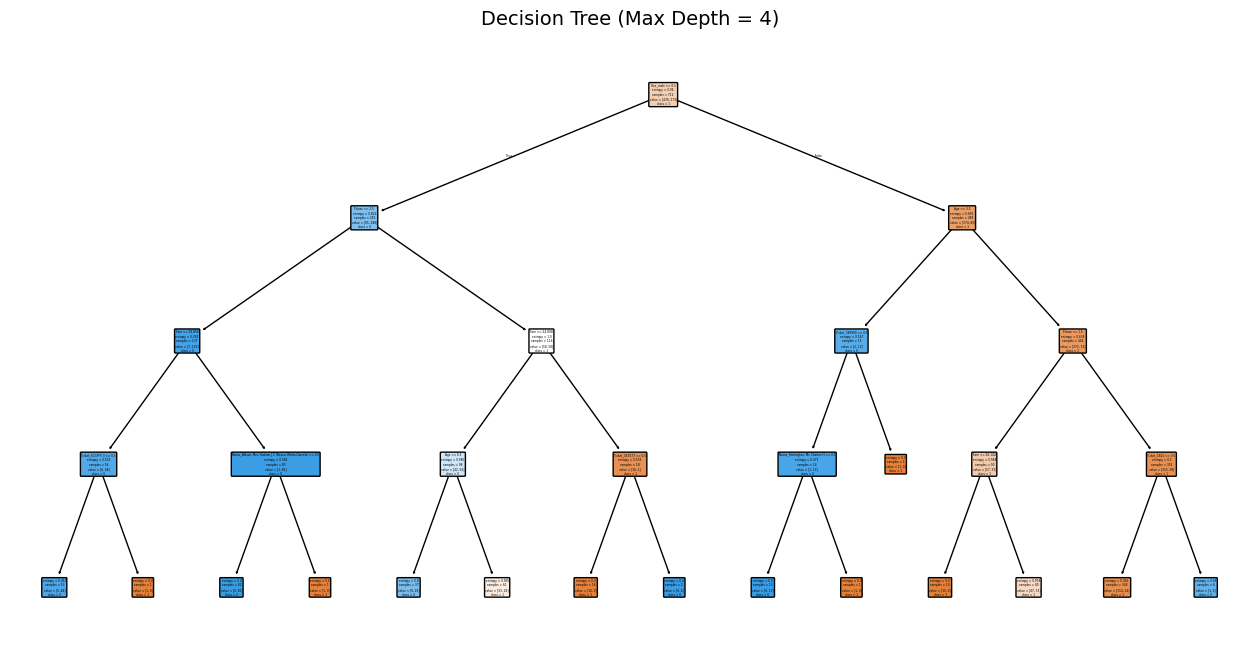

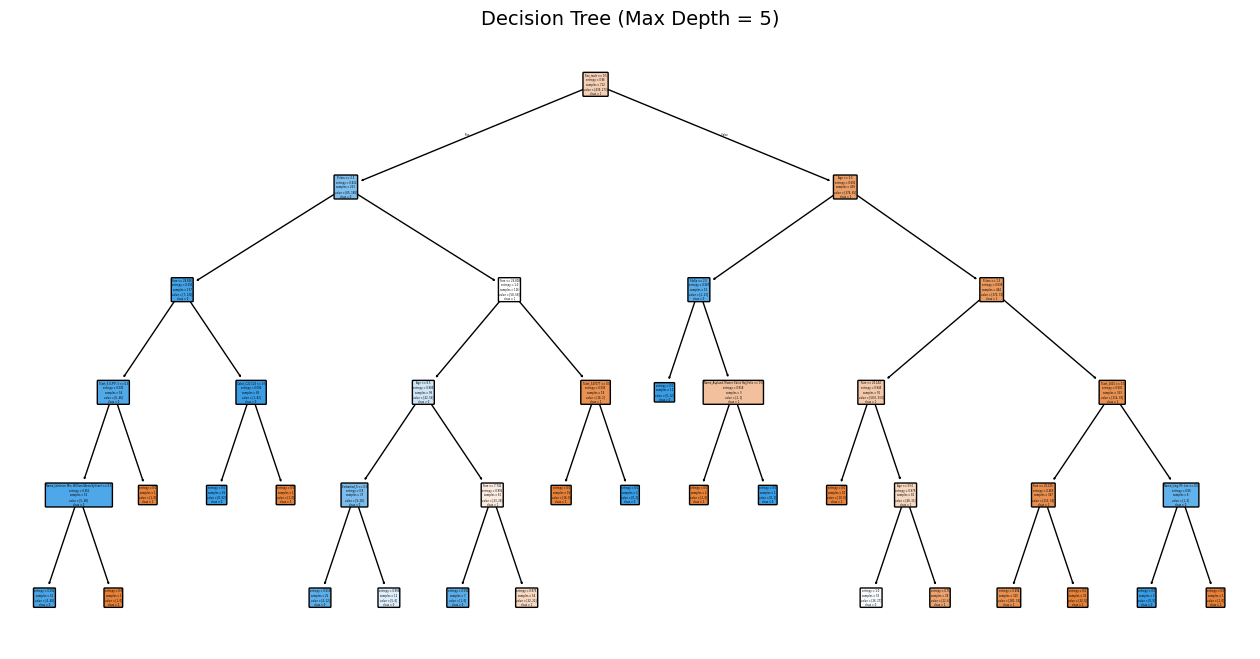

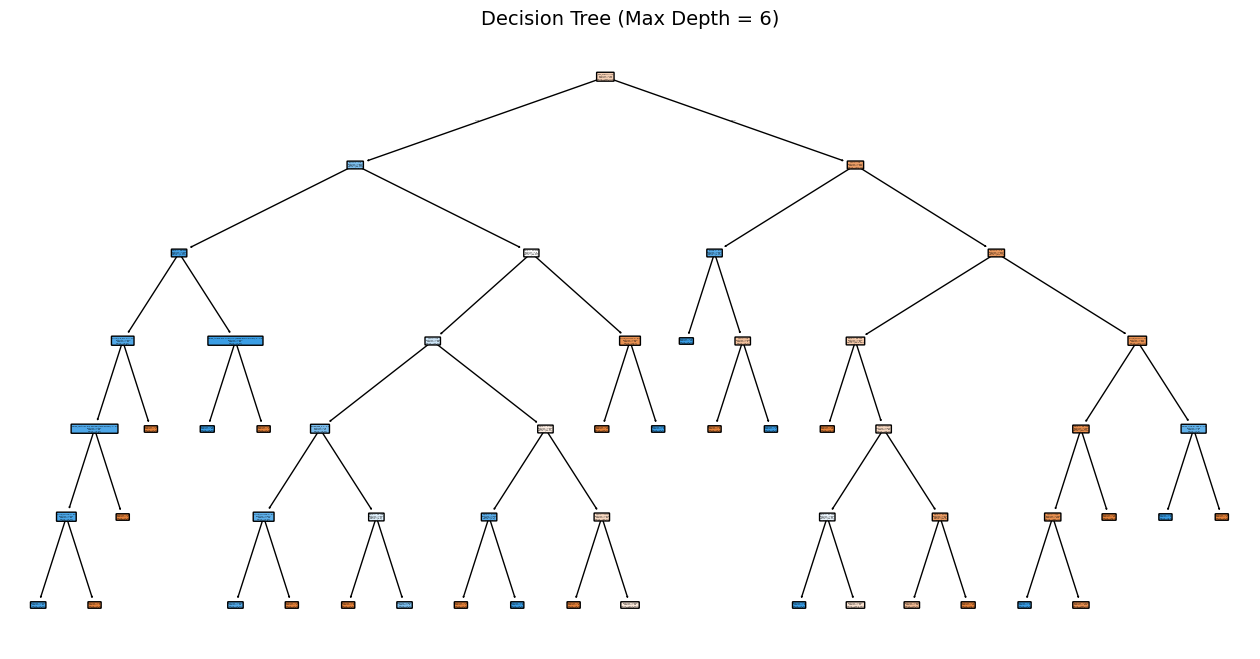

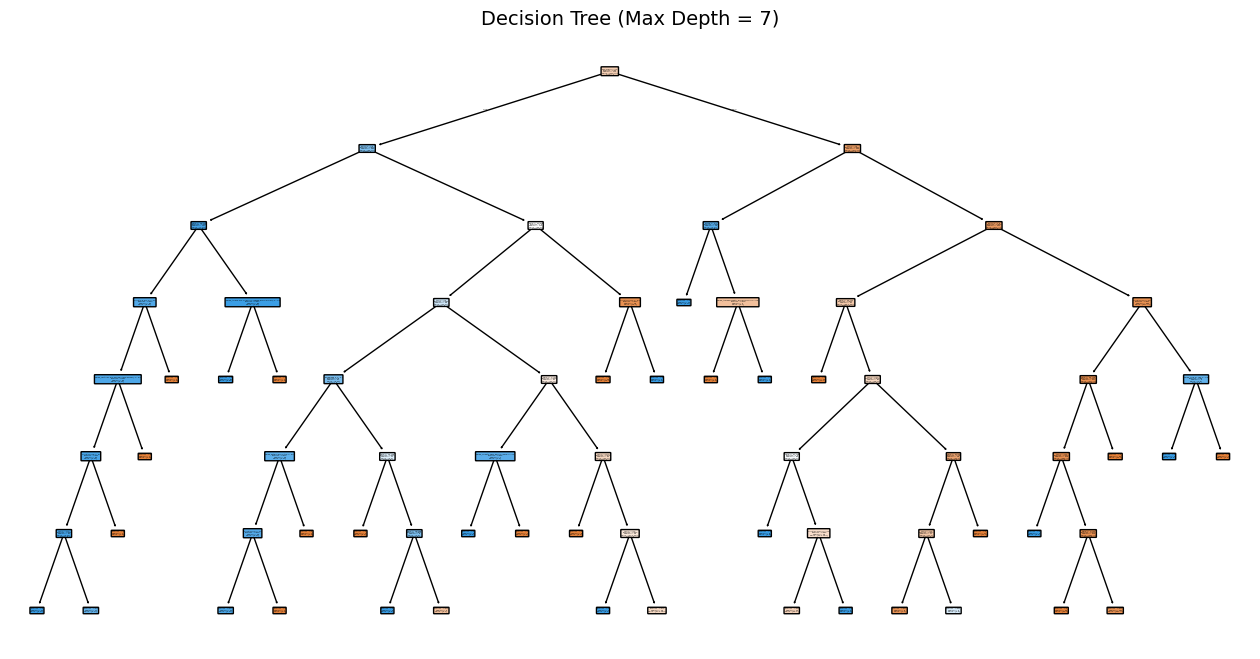

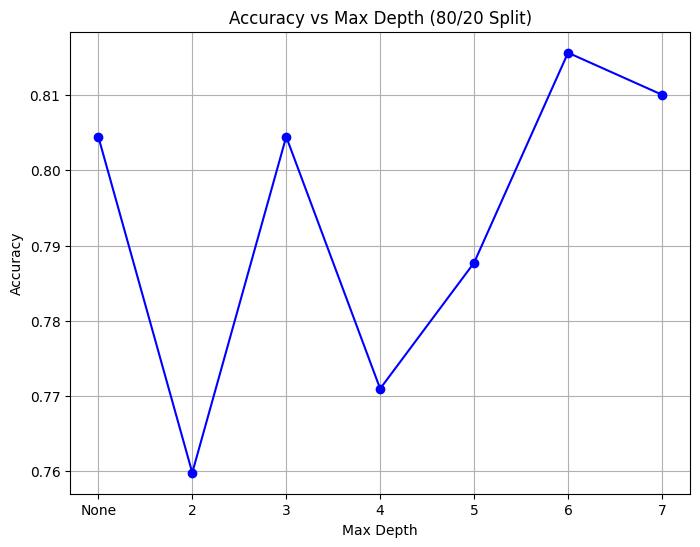


### Accuracy for Different Max Depth Values (Horizontal Format):
              None         2         3        4         5         6         7
Accuracy  0.804469  0.759777  0.804469  0.77095  0.787709  0.815642  0.810056


In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# Tập dữ liệu với tỷ lệ 80/20
train_size, test_size = (0.8, 0.2)
X_train, X_test, y_train, y_test = datasets[(train_size, test_size)]

# Danh sách các giá trị max_depth
depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

# Duyệt qua từng giá trị max_depth
for max_depth in depths:
    # Khởi tạo và huấn luyện Decision Tree
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Trực quan hóa Decision Tree với từng max_depth
    plt.figure(figsize=(16, 8))
    plot_tree(
        clf, 
        feature_names=X_train.columns, 
        class_names=y_train.unique().astype(str), 
        filled=True, 
        rounded=True
    )
    title_depth = "None" if max_depth is None else max_depth
    plt.title(f"Decision Tree (Max Depth = {title_depth})", fontsize=14)
    plt.show()

# Tạo nhãn x cho biểu đồ
x_labels = ['None' if d is None else str(d) for d in depths]

# Vẽ biểu đồ Accuracy vs Max Depth
plt.figure(figsize=(8, 6))
plt.plot(x_labels, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Max Depth (80/20 Split)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Tạo bảng kết quả với giá trị nằm ngang
accuracy_df_horizontal = pd.DataFrame([accuracies], columns=x_labels)
accuracy_df_horizontal.index = ['Accuracy']

# Hiển thị bảng kết quả dạng nằm ngang
print("\n### Accuracy for Different Max Depth Values (Horizontal Format):")
print(accuracy_df_horizontal.to_string(index=True, header=True))



# 3.Tóm tắt kết quả.

In [14]:
results = {
    "Number of Classes": [y.nunique()],
    "Number of Features": [X.shape[1]],
    "Sample Size": [X.shape[0]],
    "Accuracy": [accuracy]
}

results_df = pd.DataFrame(results)
print("Dataset Summary:")
print(results_df)


Dataset Summary:
   Number of Classes  Number of Features  Sample Size  Accuracy
0                  2                1724          891  0.810056
